# Polynomial Regression

In [2]:
import pandas as pd
import statsmodels.api as sm

In [3]:
# Read CSV file into a DataFrame
ToxinConc = pd.read_csv("D:\Academics\BTech\DSC4.51015_StatisticalModeling-1\Session 04\FungalToxinContamination.csv")

# Create the linear regression model
ToxinConclm = sm.OLS(ToxinConc['Toxin'],
                    sm.add_constant(ToxinConc[['Rain', 'NoonTemp', 'Sunshine', 'WindSpeed']])).fit()

# Display the summary
print(ToxinConclm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Toxin   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     14.11
Date:                Mon, 11 Mar 2024   Prob (F-statistic):            0.00623
Time:                        15:58:43   Log-Likelihood:                -15.260
No. Observations:                  10   AIC:                             40.52
Df Residuals:                       5   BIC:                             42.03
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6084      7.105      4.449      0.0

C:\Users\pappu\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
from pydataset import data

# Load mtcars dataset
mtcars = data('mtcars')

# Display the first few rows of the dataset
print(mtcars.head())

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  


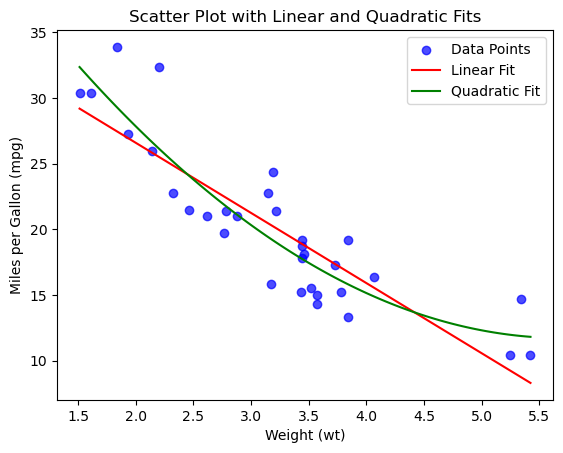

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming you have already loaded the mtcars dataset using pydataset

# Extract the 'mpg' and 'wt' columns from the mtcars dataset
mpg = mtcars['mpg']
wt = mtcars['wt']

# Define a linear function for curve fitting
def linear_func(x, a, b):
    return a * x + b

# Define a quadratic function for curve fitting
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

# Perform curve fitting for linear and quadratic functions
params_linear, covariance_linear = curve_fit(linear_func, wt, mpg)
params_quadratic, covariance_quadratic = curve_fit(quadratic_func, wt, mpg)

# Generate x values for the fitted curves
x_fit = np.linspace(min(wt), max(wt), 100)

# Calculate y values for the fitted curves
y_linear_fit = linear_func(x_fit, *params_linear)
y_quadratic_fit = quadratic_func(x_fit, *params_quadratic)

# Create a scatter plot
plt.scatter(wt, mpg, c='blue', alpha=0.7, label='Data Points')

# Plot the linear and quadratic fitted curves
plt.plot(x_fit, y_linear_fit, label='Linear Fit', color='red')
plt.plot(x_fit, y_quadratic_fit, label='Quadratic Fit', color='green')

# Add labels and title
plt.xlabel('Weight (wt)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Scatter Plot with Linear and Quadratic Fits')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [7]:
# Extract the 'mpg' and 'wt' columns from the mtcars dataset
mpg = mtcars['mpg']
wt = mtcars['wt']

# Add a constant term for the intercept
X = sm.add_constant(wt)

# Fit the OLS regression model
model = sm.OLS(mpg, X)
results = model.fit()

# Display the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           1.29e-10
Time:                        15:58:58   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.0

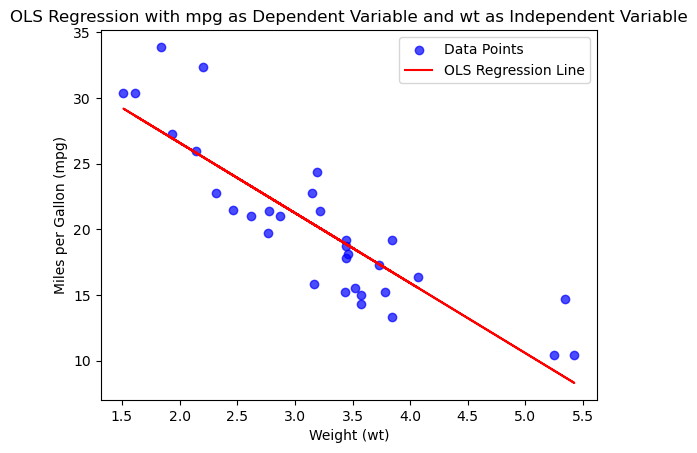

In [8]:
# Plot the regression line
plt.scatter(wt, mpg, c='blue', alpha=0.7, label='Data Points')
plt.plot(wt, results.predict(X), color='red', label='OLS Regression Line')
plt.xlabel('Weight (wt)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('OLS Regression with mpg as Dependent Variable and wt as Independent Variable')
plt.legend()
plt.show()

In [9]:
# Create a new variable for wt squared
wt_squared = wt**2

# Combine 'wt' and 'wt_squared' into a DataFrame
X_poly = pd.DataFrame({'wt': wt, 'wt_squared': wt_squared})

# Add a constant term for the intercept
X_poly = sm.add_constant(X_poly)

# Fit the polynomial regression model
model_poly = sm.OLS(mpg, X_poly)
results_poly = model_poly.fit()

# Display the regression results
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     65.64
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           1.71e-11
Time:                        15:58:59   Log-Likelihood:                -75.024
No. Observations:                  32   AIC:                             156.0
Df Residuals:                      29   BIC:                             160.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9308      4.211     11.856      0.0

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     65.64
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           1.71e-11
Time:                        15:58:59   Log-Likelihood:                -75.024
No. Observations:                  32   AIC:                             156.0
Df Residuals:                      29   BIC:                             160.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9308      4.211     11.856      0.0

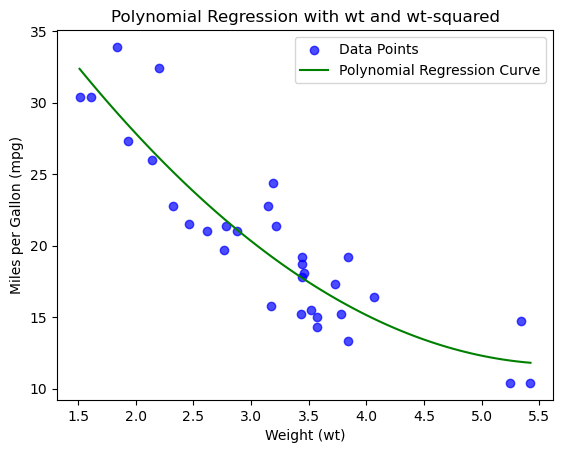

In [10]:
# Generate values for wt to create a smooth curve
wt_smooth = np.linspace(min(wt), max(wt), 100)
wt_squared_smooth = wt_smooth**2

# Combine 'wt_smooth' and 'wt_squared_smooth' into a DataFrame
X_poly_smooth = pd.DataFrame({'wt': wt_smooth, 'wt_squared': wt_squared_smooth})

# Add a constant term for the intercept
X_poly_smooth = sm.add_constant(X_poly_smooth)

# Predict values using the fitted model
mpg_smooth = results_poly.predict(X_poly_smooth)

# Display the regression results
print(results_poly.summary())

# Plot the scatter plot with polynomial regression curve
plt.scatter(wt, mpg, c='blue', alpha=0.7, label='Data Points')
plt.plot(wt_smooth, mpg_smooth, color='green', label='Polynomial Regression Curve')
plt.xlabel('Weight (wt)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Polynomial Regression with wt and wt-squared')
plt.legend()
plt.show()

In [11]:
# Create a DataFrame with the polynomial features
X_poly = pd.DataFrame({'wt': wt, 'wt_squared': wt**2})

# Add a constant term for the intercept
X_poly = sm.add_constant(X_poly)

# Fit the polynomial regression model
model_poly = sm.OLS(mpg, X_poly)
results_poly = model_poly.fit()

# Display the regression results
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     65.64
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           1.71e-11
Time:                        15:58:59   Log-Likelihood:                -75.024
No. Observations:                  32   AIC:                             156.0
Df Residuals:                      29   BIC:                             160.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9308      4.211     11.856      0.0

In [12]:
from lmdiag import plot

# Linear model
X_linear = sm.add_constant(wt)
model_linear = sm.OLS(mpg, X_linear)
results_linear = model_linear.fit()

C:\Users\pappu\AppData\Local\Temp\ipykernel_127796\971502613.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add space between the title and plots


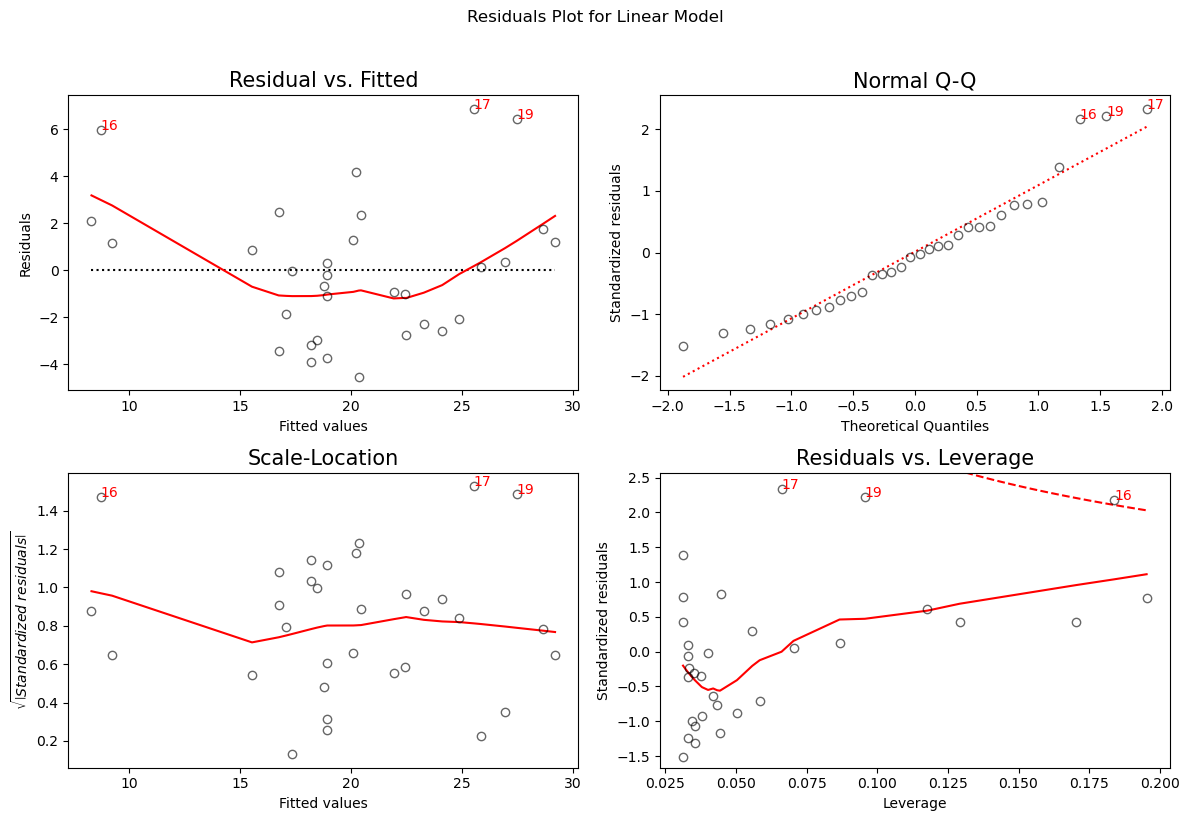

In [24]:
# Residual plots for linear model
plt.figure(figsize=(12, 8))

plot(results_linear)
plt.suptitle('Residuals Plot for Linear Model', y=1.02)  # Adjust the y-coordinate for space
plt.tight_layout()  # Add space between the title and plots
plt.show()

In [14]:
# Polynomial model
X_poly = pd.DataFrame({'wt': wt, 'wt_squared': wt**2})
X_poly = sm.add_constant(X_poly)
model_poly = sm.OLS(mpg, X_poly)
results_poly = model_poly.fit()

C:\Users\pappu\AppData\Local\Temp\ipykernel_127796\1285250533.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add space between the title and plots


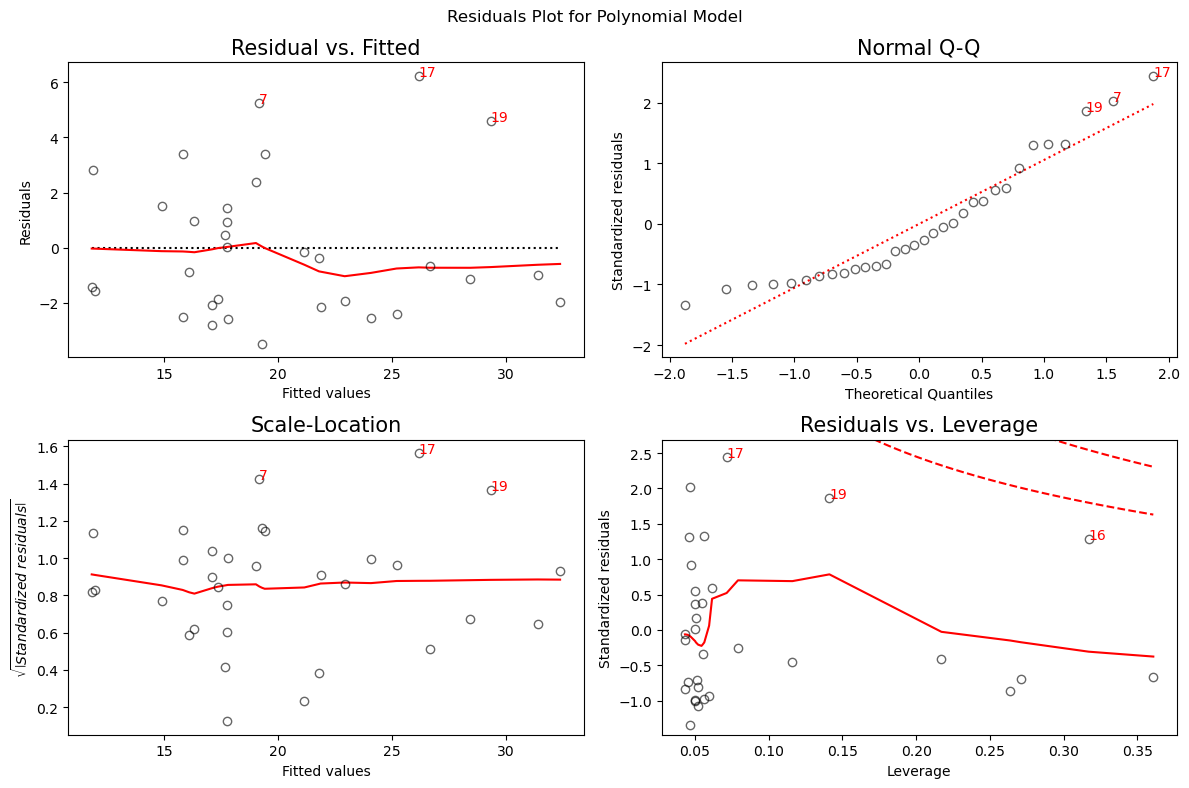

<Figure size 640x480 with 0 Axes>

In [15]:
# Residual plots for polynomial model
plt.figure(figsize=(12, 8))

plot(results_poly)
plt.suptitle('Residuals Plot for Polynomial Model')
plt.tight_layout()  # Add space between the title and plots
plt.show()
plt.tight_layout(pad=0)  # Remove the tight layout

# Regression with Interaction Terms

In [16]:
# Extract the 'qsec' column from the mtcars dataset
qsec = mtcars['qsec']

# Create interaction term: wt_squared * qsec
interaction_term = wt**2 * qsec

# Combine 'wt', 'wt_squared', 'qsec', and the interaction term into a DataFrame
X_interaction = pd.DataFrame({'wt': wt, 'wt_squared': wt**2, 'qsec': qsec, 'interaction': interaction_term})

# Add a constant term for the intercept
X_interaction = sm.add_constant(X_interaction)

# Fit the regression model with the interaction term
model_interaction = sm.OLS(mpg, X_interaction)
results_interaction = model_interaction.fit()

# Display the regression results
print(results_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     52.98
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           2.14e-12
Time:                        15:59:06   Log-Likelihood:                -67.494
No. Observations:                  32   AIC:                             145.0
Df Residuals:                      27   BIC:                             152.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.9534     14.950      1.134      

C:\Users\pappu\AppData\Local\Temp\ipykernel_127796\2608939873.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0)  # Remove the tight layout


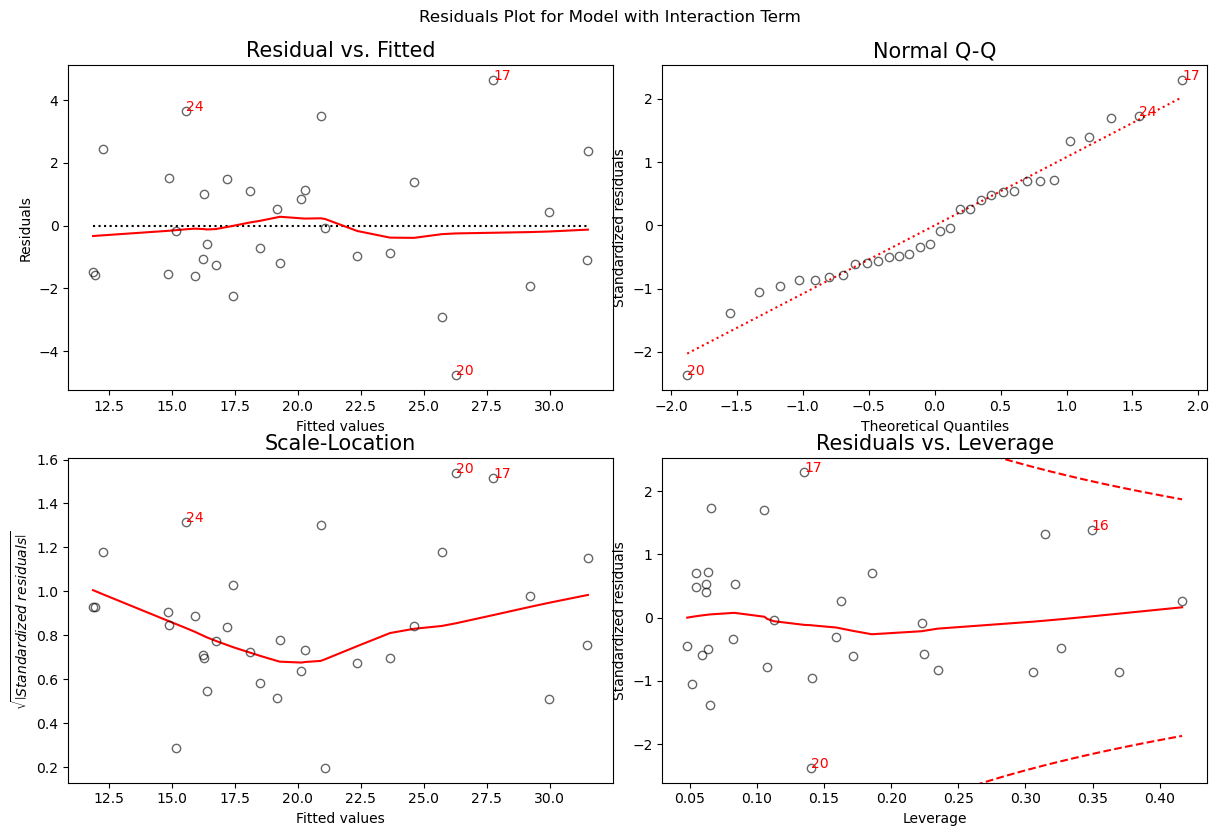

In [17]:
# Residual plots for the model with interaction term
plt.figure(figsize=(12, 8))

# Residual plots
plot(results_interaction)
plt.suptitle('Residuals Plot for Model with Interaction Term', y=1.02)  # Adjust the y-coordinate for space
plt.tight_layout(pad=0)  # Remove the tight layout
plt.show()

In [22]:
import math

# Extract the 'mpg' and 'wt' columns from the mtcars dataset
mpg = mtcars['mpg']
wt = mtcars['wt']

# Create a new variable 'sqrt_wt' with the square root of 'wt'
mtcars['sqrt_wt'] = wt.apply(lambda x: x ** 0.5)

# Add a constant term for the intercept
X = sm.add_constant(mtcars['sqrt_wt'])

# Fit the OLS regression model
model_sqrtX = sm.OLS(mpg, X).fit()

# Display the regression results
print(model_sqrtX.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     113.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           1.07e-11
Time:                        16:09:03   Log-Likelihood:                -77.379
No. Observations:                  32   AIC:                             158.8
Df Residuals:                      30   BIC:                             161.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.7525      3.297     16.609      0.0

C:\Users\pappu\AppData\Local\Temp\ipykernel_127796\1443176346.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0)  # Remove the tight layout


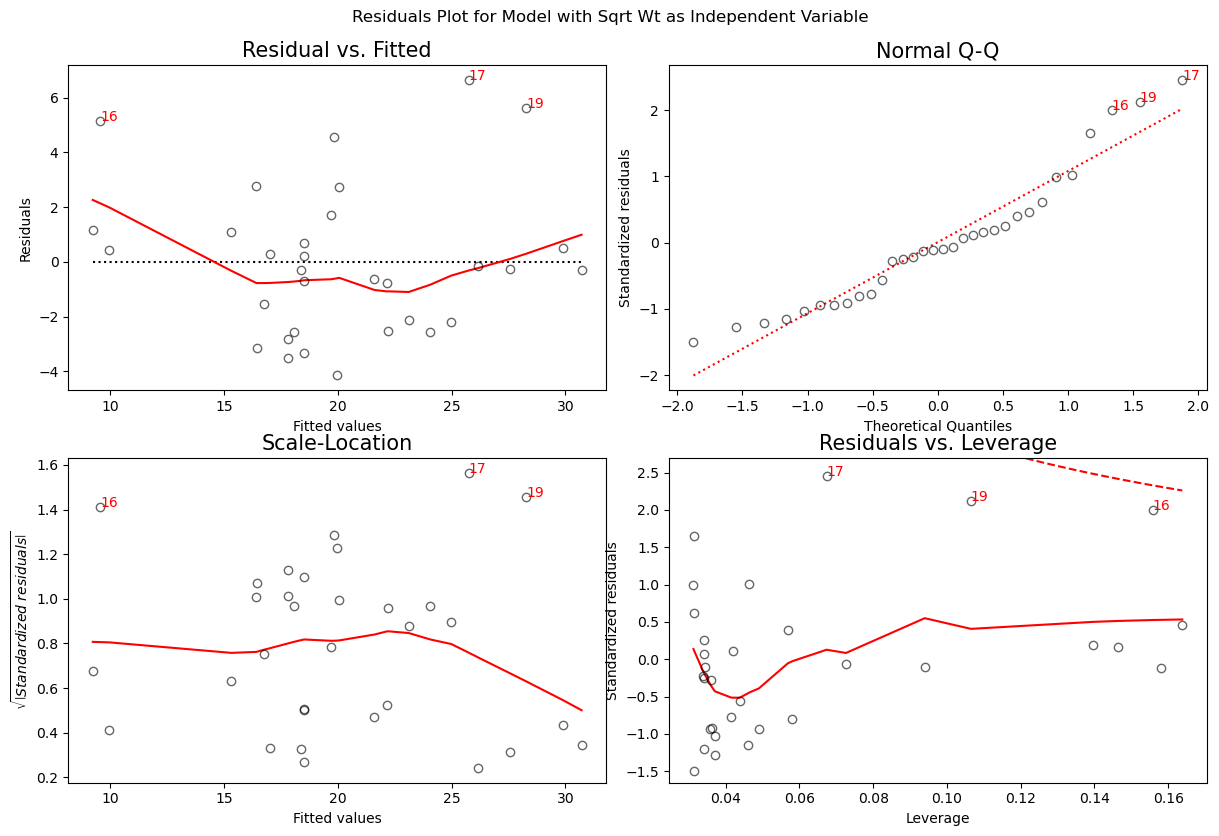

In [23]:
# Residual plots for the model with interaction term
plt.figure(figsize=(12, 8))

# Residual plots
plot(model_sqrtX)
plt.suptitle('Residuals Plot for Model with Sqrt Wt as Independent Variable', y=1.02)  # Adjust the y-coordinate for space
plt.tight_layout(pad=0)  # Remove the tight layout
plt.show()

In [25]:
# Create a new variable 'ln_wt' with the natural logarithm of 'wt'
mtcars['ln_wt'] = np.log(wt)

# Add a constant term for the intercept
X = sm.add_constant(mtcars['ln_wt'])

# Fit the OLS regression model
model_lnX = sm.OLS(mpg, X).fit()

# Display the regression results
print(model_lnX.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     128.0
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           2.39e-12
Time:                        16:20:10   Log-Likelihood:                -75.794
No. Observations:                  32   AIC:                             155.6
Df Residuals:                      30   BIC:                             158.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.2565      1.758     22.325      0.0

C:\Users\pappu\AppData\Local\Temp\ipykernel_127796\530574822.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0)  # Remove the tight layout


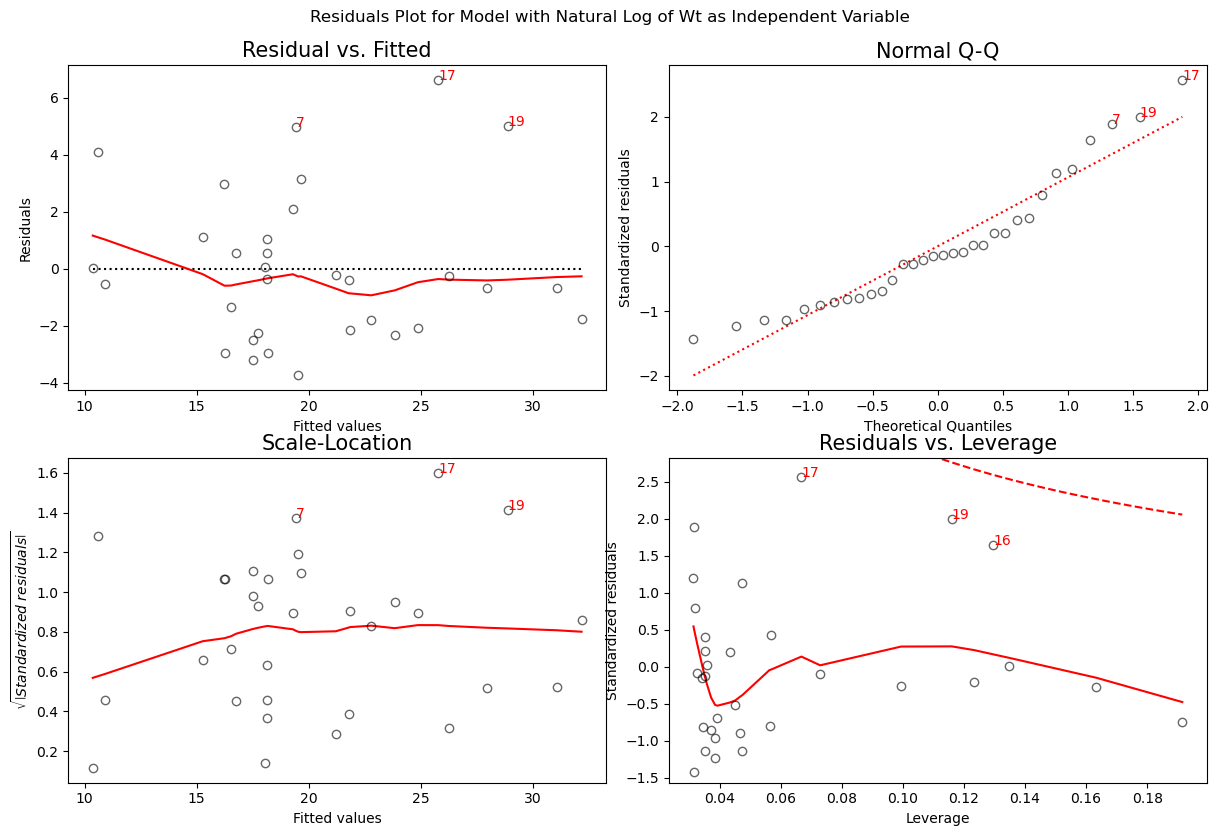

In [26]:
# Residual plots for the model with interaction term
plt.figure(figsize=(12, 8))

# Residual plots
plot(model_lnX)
plt.suptitle('Residuals Plot for Model with Natural Log of Wt as Independent Variable', y=1.02)  # Adjust the y-coordinate for space
plt.tight_layout(pad=0)  # Remove the tight layout
plt.show()

# Data Transformations

In [27]:
# Extract the 'mpg' and 'wt' columns from the mtcars dataset
mpg = mtcars['mpg']
wt = mtcars['wt']

# Add a constant term for the intercept
X = sm.add_constant(wt)

# Fit the OLS regression model
model = sm.OLS(mpg, X)
results = model.fit()

# Display the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.29e-10
Time:                        16:49:45   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.0

C:\Users\pappu\AppData\Local\Temp\ipykernel_127796\3645605844.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add space between the title and plots


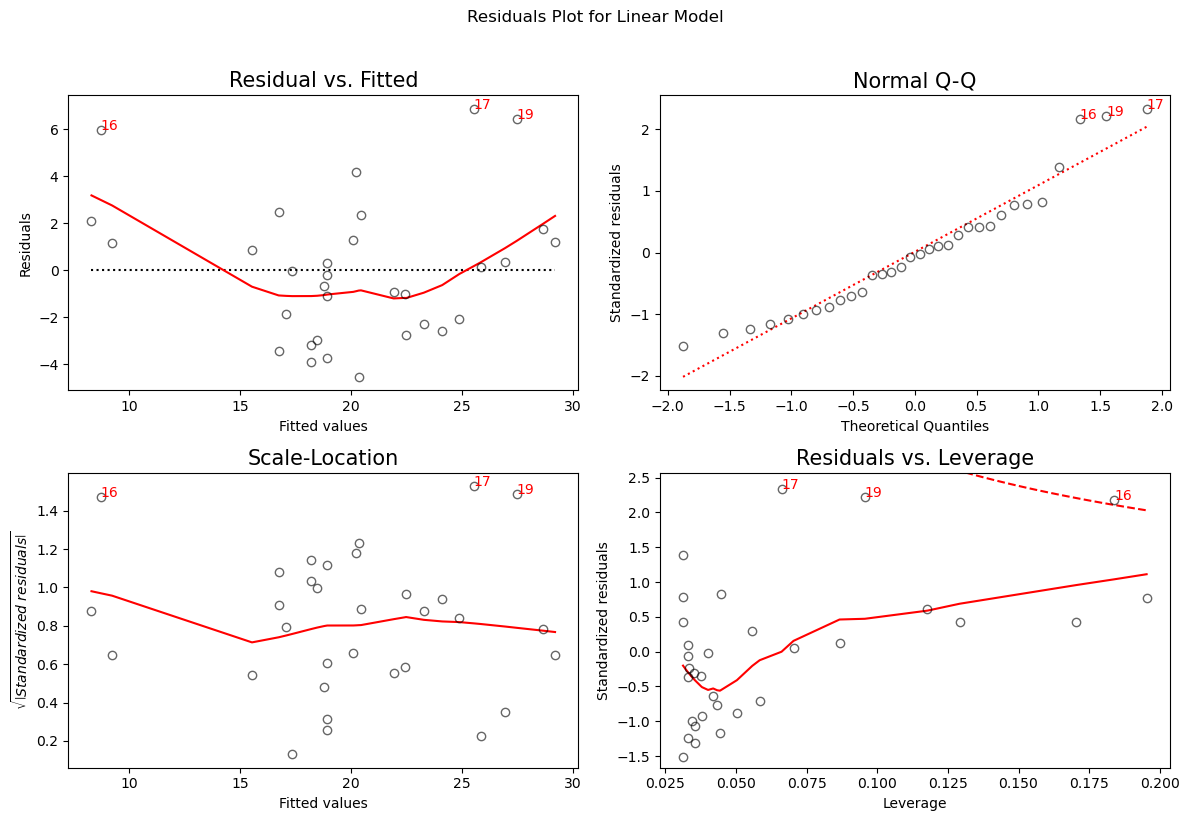

In [28]:
# Residual plots for linear model
plt.figure(figsize=(12, 8))

plot(results)
plt.suptitle('Residuals Plot for Linear Model', y=1.02)  # Adjust the y-coordinate for space
plt.tight_layout()  # Add space between the title and plots
plt.show()

In [29]:
from scipy.stats import boxcox

In [73]:
transformed_data, lambda_value = boxcox(mpg)
print(lambda_value)

0.029565234954054682


In [34]:
from scipy.stats import yeojohnson

In [71]:
transformed_data, lambda_value = yeojohnson(wt)
print(lambda_value)

0.30666945372393717


In [57]:
from sklearn.preprocessing import PowerTransformer

In [69]:
# Load mtcars dataset
from pydataset import data
mtcars = data('mtcars')

# Selecting all numeric variables
numeric_cols = mtcars.select_dtypes(include=np.number).columns
data = mtcars[numeric_cols]

# Initialize the PowerTransformer with the Yeo-Johnson method
pt_yeojohnson = PowerTransformer(method='yeo-johnson')
transformed_data_yeojohnson = pt_yeojohnson.fit_transform(data)

# Convert the transformed data back to a DataFrame with column names
transformed_df = pd.DataFrame(transformed_data_yeojohnson, columns=numeric_cols)

print(transformed_df)

         mpg       cyl      disp        hp      drat        wt      qsec  \
0   0.293385 -0.123853 -0.421712 -0.407404  0.629460 -0.573895 -0.774602   
1   0.293385 -0.123853 -0.421712 -0.407404  0.629460 -0.286565 -0.429372   
2   0.575460 -1.238936 -1.045055 -0.757862  0.541297 -0.930501  0.482333   
3   0.358055 -0.123853  0.414989 -0.407404 -0.988918  0.076821  0.922482   
4  -0.103475  1.035376  1.054148  0.591583 -0.834584  0.306252 -0.429372   
5  -0.214805 -0.123853  0.166008 -0.505087 -1.741687  0.326253  1.316318   
6  -1.015418  1.035376  1.054148  1.343061 -0.705004  0.435157 -1.173256   
7   0.808472 -1.238936 -0.564196 -1.580785  0.250920  0.050809  1.207082   
8   0.575460 -1.238936 -0.630617 -0.713759  0.664394  0.008964  2.543499   
9  -0.013314 -0.123853 -0.344359 -0.171061  0.664394  0.306252  0.311958   
10 -0.271816 -0.123853 -0.344359 -0.171061  0.664394  0.306252  0.638711   
11 -0.550773  1.035376  0.539178  0.653607 -1.011251  0.908479 -0.202619   
12 -0.368932

In [70]:
# Access the lambdas for each variable
lambdas_yeojohnson = pt_yeojohnson.lambdas_

print("Lambda values for each variable (Yeo-Johnson):", lambdas_yeojohnson)

Lambda values for each variable (Yeo-Johnson): [-0.02122677  1.13413485  0.22254043  0.08784961 -0.31831713  0.30666945
 -0.24356527 -1.09231712 -1.65844552 -2.0196172  -0.17609891]


# Handling Multicollinearity

In [80]:
# Extract dependent and independent variables
mpg = mtcars['mpg']
X = mtcars.drop(['mpg'], axis=1)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(mpg, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           3.79e-07
Time:                        18:54:17   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.5

In [81]:
# Read the dataset
crude_oil_output = pd.read_csv(r"D:\Academics\BTech\DSC4.51015_StatisticalModeling-1\Session 05\CrudeOilOutput.csv")

# Calculate the correlation matrix
correlation_matrix = crude_oil_output.corr()

# Set the display options for Pandas
pd.set_option('display.max_columns', None)  # Display all columns without truncation
pd.set_option('display.width', 1000)         # Allow long lines to be displayed without line breaks

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                WorldOil  USEnergy  USAutoFuelRate  USNuclear    USCoal  USDryGas
WorldOil        1.000000  0.923252        0.585232   0.670815  0.623787  0.214418
USEnergy        0.923252  1.000000        0.790683   0.855757  0.791121  0.057034
USAutoFuelRate  0.585232  0.790683        1.000000   0.972109  0.967919 -0.422824
USNuclear       0.670815  0.855757        0.972109   1.000000  0.952128 -0.404187
USCoal          0.623787  0.791121        0.967919   0.952128  1.000000 -0.448483
USDryGas        0.214418  0.057034       -0.422824  -0.404187 -0.448483  1.000000


C:\Users\pappu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


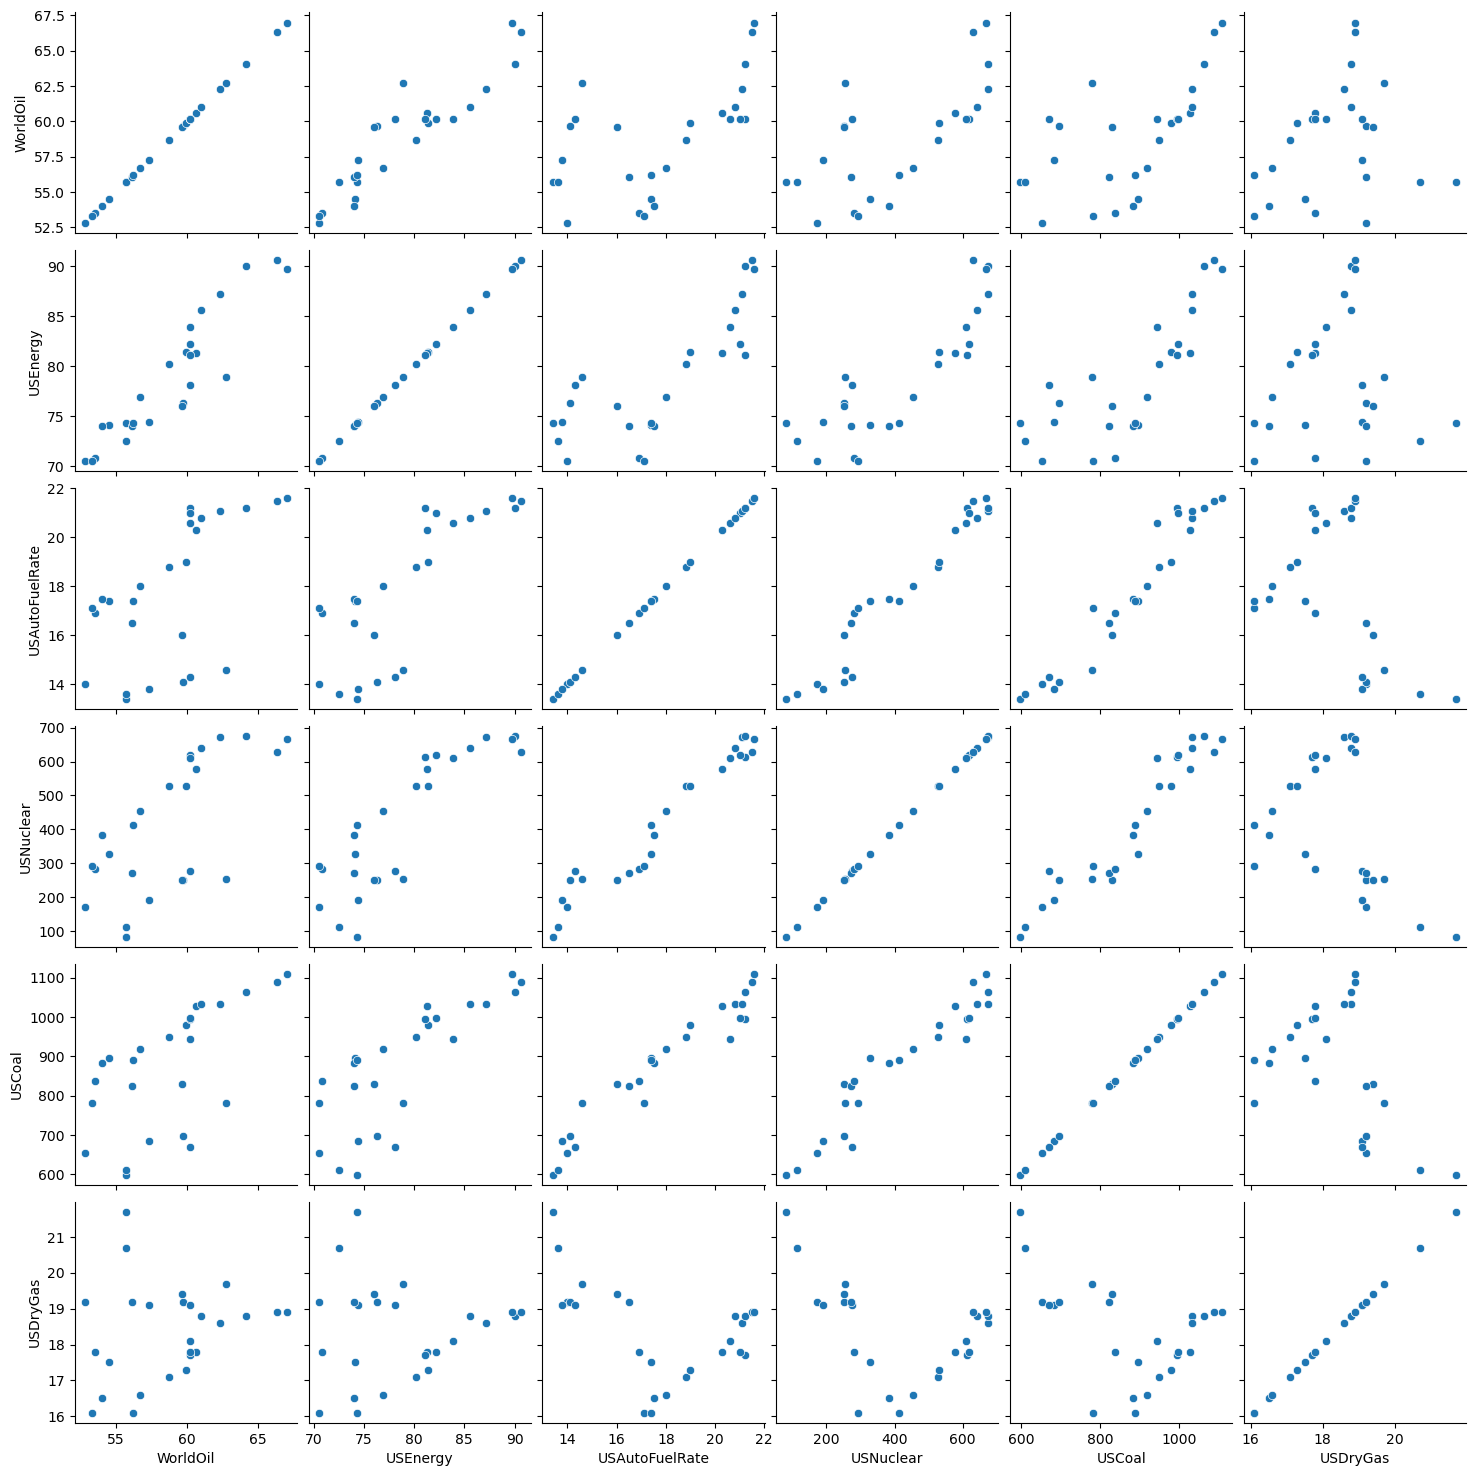

In [82]:
import seaborn as sns

# Create a matrix of scatter plots without histograms along the diagonal
sns.pairplot(crude_oil_output, diag_kind=None)

# Display the plot
plt.show()

In [84]:
# Extract dependent and independent variables
WorldOil = crude_oil_output['WorldOil']
X = crude_oil_output.drop(['WorldOil'], axis=1)

# Add a constant term for the intercept
X_with_constant = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(WorldOil, X_with_constant).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               WorldOil   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     46.62
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           2.41e-10
Time:                        18:58:14   Log-Likelihood:                -38.539
No. Observations:                  26   AIC:                             89.08
Df Residuals:                      20   BIC:                             96.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7085      8.909      0.

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF (excluding the constant term)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(1, X_with_constant.shape[1])]

print("VIF:")
print(vif_data)

VIF:
         Variable        VIF
0        USEnergy  20.822780
1  USAutoFuelRate  42.494049
2       USNuclear  61.549771
3          USCoal  21.346305
4        USDryGas   6.188241


In [86]:
# Understanding multicollinearity of USAutoFuelRate
# Consider USAutoFuelRate as dependent and the rest (minus the WorldOil) as independent variables
USAutoFuelRate = crude_oil_output['USAutoFuelRate']
X = crude_oil_output.drop(['WorldOil'] + ['USAutoFuelRate'], axis=1)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(USAutoFuelRate, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         USAutoFuelRate   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     217.8
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           8.99e-17
Time:                        18:59:01   Log-Likelihood:                -15.194
No. Observations:                  26   AIC:                             40.39
Df Residuals:                      21   BIC:                             46.68
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3198      2.539      4.459      0.0

In [87]:
model.rsquared

0.9764672929624122

In [88]:
1/(1-model.rsquared)

42.49404874682466